# Make plots of the climate data swaths along the San Andreas Fault

## Mean NDVI

In [1]:
import matplotlib.pyplot as plt
import pyosp
from pyosp import read_shape

In [12]:
# define the rasters and baseline shapefile
base_dir = "/media/TopographicData/TopographicData/san_andreas/"
ndvi_raster = base_dir+"Climate_data/NDVI/S2_NDVI_Mean_UTM11N_noseas_final.tif" # Mean NDVI
ndvi_std_raster = base_dir+"Climate_data/NDVI/S2_NDVI_Std_float32_UTM11N_noseas.tif" # Std NDVI
gpm_raster = base_dir+"Climate_data/GPM/California_2000-2020_GPM_Mean_float32_mmyr_UTM11N.tif" # GPM
prism_raster = base_dir+"Climate_data/PRISM/stanford_1981-2010_800m_mm_UTM11N.tif" # PRISM

# push the rasters to a list of rasters for looping
rasters = [ndvi_raster, ndvi_std_raster, gpm_raster, prism_raster]
baseline = base_dir+"SAF_combined/SanAndreasFault_UTM11N_NtoS.shp"  # the path to baseline shapefile

In [15]:
# get the swath objects
swaths = []
for r in rasters:
    orig = pyosp.Orig_curv(
        baseline,
        r,
        width=50000,
        line_stepsize=1000,
        cross_stepsize=100
    )
    swaths.append(orig)

Processing: [#########################] 1103 of 1103 lineSteps

In [16]:
swaths

[Orig_curv, Orig_curv, Orig_curv, Orig_curv]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 6.799999999999965, 'Distance along fault (km)')

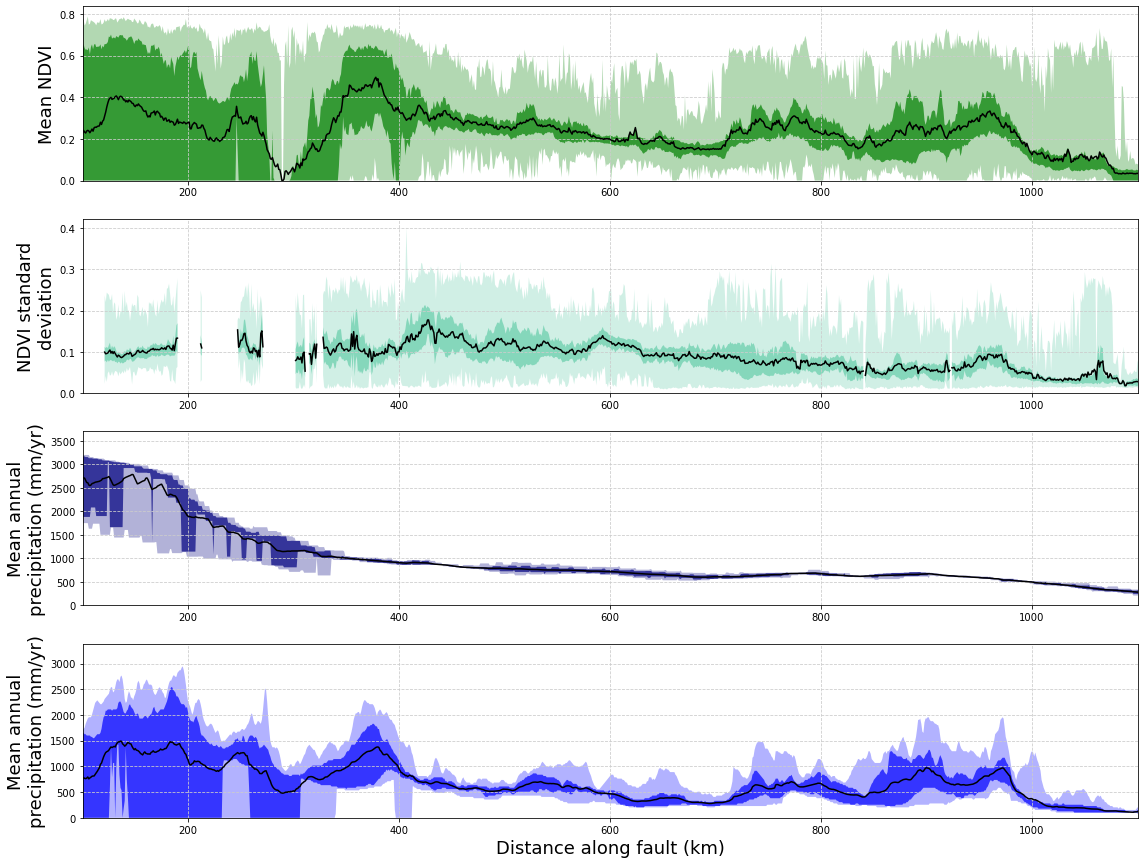

In [36]:
# make a nice final plot
fig, ax = plt.subplots(nrows=len(swaths), ncols=1, figsize=(16,12))
ax = ax.ravel()

colors = ['green', 'mediumaquamarine', 'navy', 'blue']
ylabels = ['Mean NDVI', 'NDVI standard\ndeviation', 'Mean annual\nprecipitation (mm/yr)', 'Mean annual\nprecipitation (mm/yr)']
for i,s in enumerate(swaths):
    s.profile_plot(ax=ax[i], color=colors[i])
    ax[i].set_xlabel("")
    ax[i].set_ylabel(ylabels[i], fontsize=18)
    ax[i].get_legend().remove()
    ax[i].grid(color='0.8', linestyle='--', which='both')
    ax[i].set_xlim(100,1100)
    ax[i].set_ylim(0,)

plt.xlabel('Distance along fault (km)', fontsize=18)

In [37]:
fig.savefig(base_dir+"Climate_data/Climate_swaths.png", dpi=300, transparent=False, facecolor='white')